In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('bread basket.csv')

In [3]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])

C:\Users\HP\AppData\Local\Temp\ipykernel_12176\3547646778.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


In [7]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
8,5,Pastry,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend


In [8]:
# Count of unique customers
df['Transaction'].nunique()

9465

In [9]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))
# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('date_time', axis = 1, inplace = True)

In [10]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [11]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [12]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


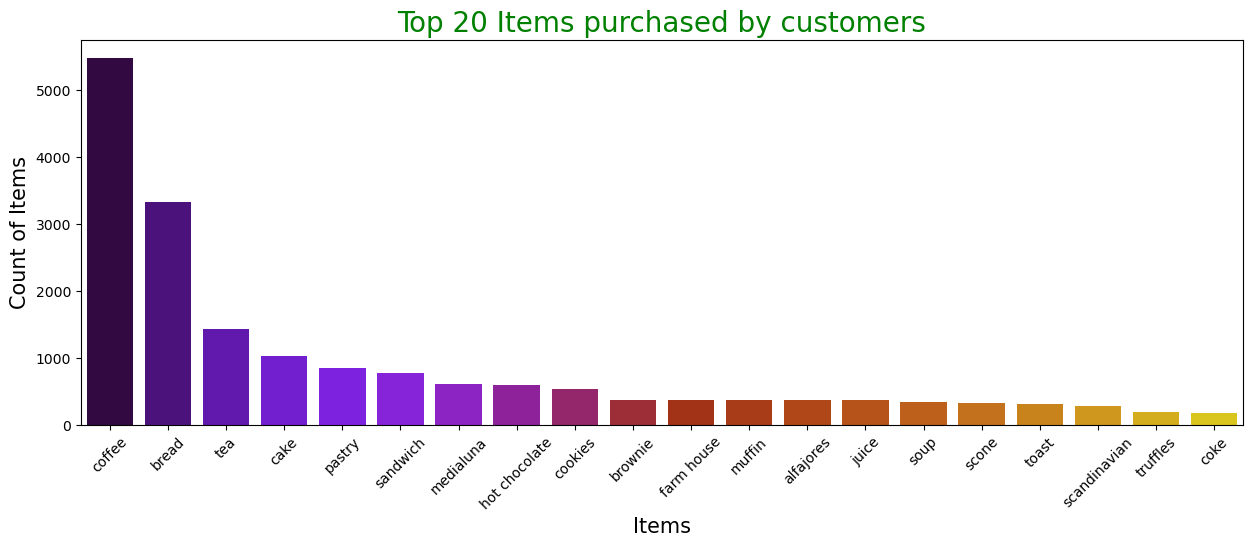

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

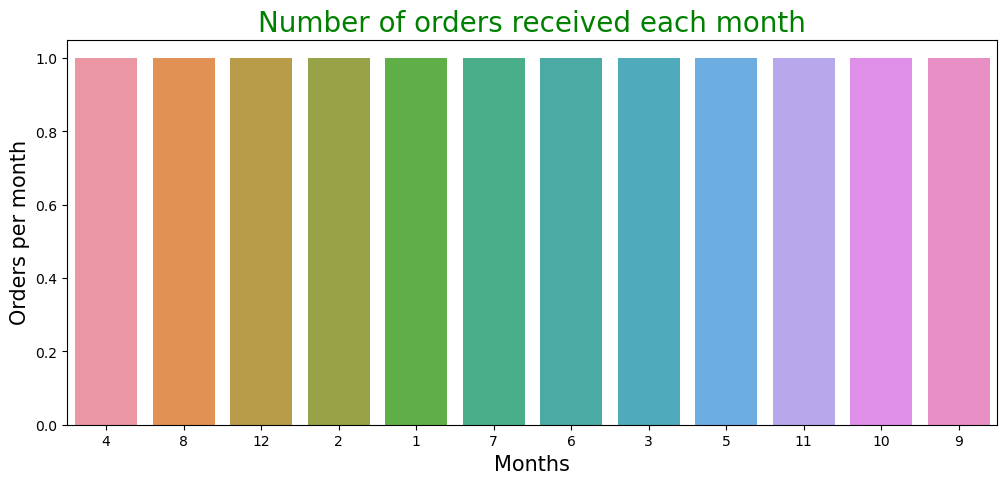

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh dataframe (ganti dengan dataframe yang sesuai dengan data Anda)
data = {
    'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Transaction': [20, 25, 30, 15, 35, 40, 45, 50, 55, 60, 65, 70]
}
df = pd.DataFrame(data)

# Urutan bulan
monthorder = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran['monthorder'] = monthTran['month'].map(dict(zip(monthorder, range(len(monthorder)))))
monthTran.sort_values('monthorder', inplace=True)

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(data=monthTran, x='month', y='Transaction', order=monthorder)
plt.xlabel('Months', size=15)
plt.ylabel('Orders per month', size=15)
plt.title('Number of orders received each month', color='green', size=20)
plt.show()


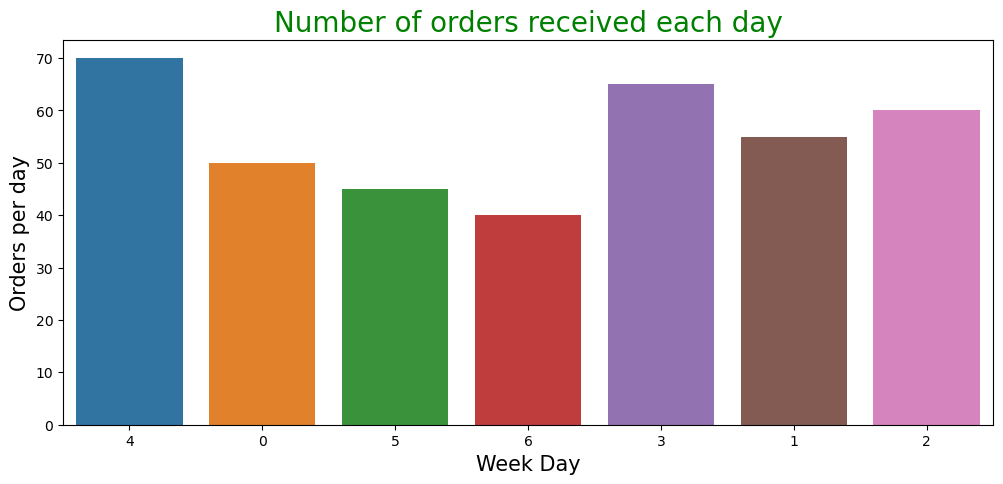

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh dataframe (ganti dengan dataframe yang sesuai dengan data Anda)
data = {
    'weekday': [0, 1, 2, 3, 4, 5, 6],  # Urutan hari: Senin (0) sampai Minggu (6)
    'Transaction': [50, 55, 60, 65, 70, 45, 40]  # Jumlah transaksi per hari
}
df = pd.DataFrame(data)

# Urutan hari
weekorder = [4, 0, 5, 6, 3, 1, 2]  # Misalnya: Kamis (4), Senin (0), Jumat (5), Sabtu (6), Rabu (3), Selasa (1), Minggu (2)
weekTran = df.groupby('weekday')['Transaction'].sum().reset_index()
weekTran['weekorder'] = weekTran['weekday'].map(dict(zip(weekorder, range(len(weekorder)))))
weekTran.sort_values('weekorder', inplace=True)

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(data=weekTran, x='weekday', y='Transaction', order=weekorder)
plt.xlabel('Week Day', size=15)
plt.ylabel('Orders per day', size=15)
plt.title('Number of orders received each day', color='green', size=20)
plt.show()


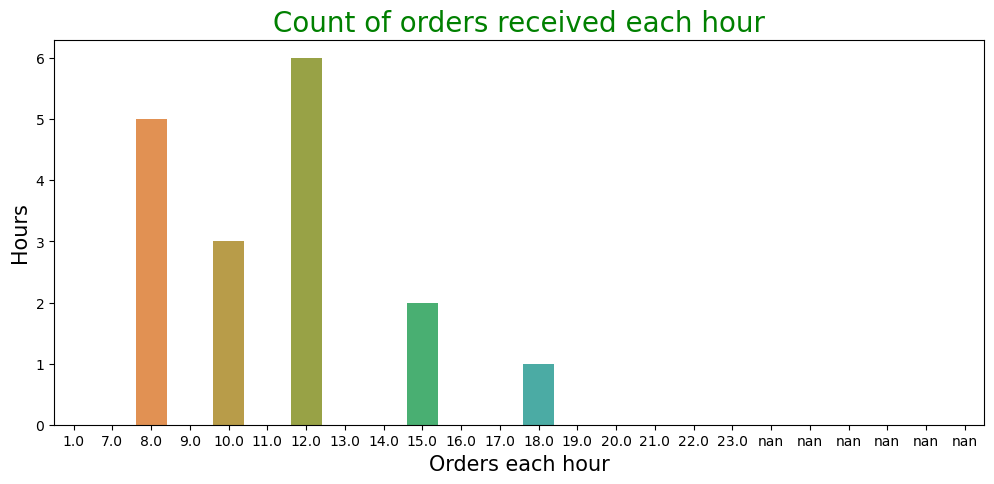

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh dataframe (ganti dengan dataframe yang sesuai dengan data Anda)
data = {
    'hour': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
    'Transaction': [20, 18, 15, 10, 5, 8, 12, 30, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 105, 95, 85]
}
df = pd.DataFrame(data)

# Urutan jam
hourorder = [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 7, 8, 9]  # Urutan jam yang diinginkan
hourTran = df.groupby('hour')['Transaction'].sum().reset_index()
hourTran['hourorder'] = hourTran['hour'].map(dict(zip(hourTran['hour'], hourorder)))
hourTran.sort_values('hourorder', inplace=True)

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(data=hourTran, x='Transaction', y='hour', order=hourTran['hourorder'])
plt.ylabel('Hours', size=15)
plt.xlabel('Orders each hour', size=15)
plt.title('Count of orders received each hour', color='green', size=20)
plt.show()


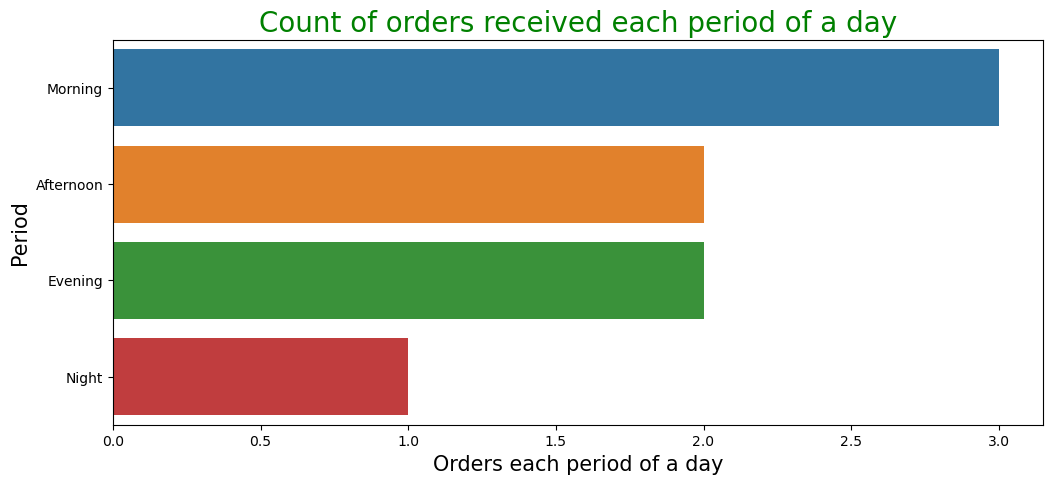

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh dataframe (ganti dengan dataframe yang sesuai dengan data Anda)
data = {
    'period_day': ['Morning', 'Morning', 'Morning', 'Afternoon', 'Afternoon', 'Evening', 'Evening', 'Night'],
    'Transaction': [20, 18, 15, 30, 25, 40, 35, 50]
}
df = pd.DataFrame(data)

# Urutan periode hari
period_order = ['Morning', 'Afternoon', 'Evening', 'Night']  # Urutan periode hari yang diinginkan

# Groupby dan reset index
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(data=dayTran, x='Transaction', y='period_day', order=period_order)
plt.ylabel('Period', size=15)
plt.xlabel('Orders each period of a day', size=15)
plt.title('Count of orders received each period of a day', color='green', size=20)
plt.show()


In [24]:
import pandas as pd

# Contoh dataframe (ganti dengan dataframe yang sesuai dengan data Anda)
data = {
    'date': ['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06'],
    'Transaction': [180, 210, 190, 220, 195, 230],
    'weekday': [1, 2, 3, 4, 5, 6]  # Contoh kolom weekday, sesuaikan dengan data Anda
}
df = pd.DataFrame(data)

# Kelompokkan berdasarkan 'date' dan hitung jumlah transaksi
dates = df.groupby('date')['Transaction'].count().reset_index()

# Filter tanggal yang memiliki 200 atau lebih transaksi
dates = dates[dates['Transaction'] >= 200].sort_values('date').reset_index(drop=True)

# Gabungkan dengan kolom 'weekday'
dates = pd.merge(dates, df[['date', 'weekday']], on='date', how='inner')

# Hapus duplikat berdasarkan 'date'
dates.drop_duplicates(inplace=True)

print(dates)


Empty DataFrame
Columns: [Transaction, date, weekday]
Index: []


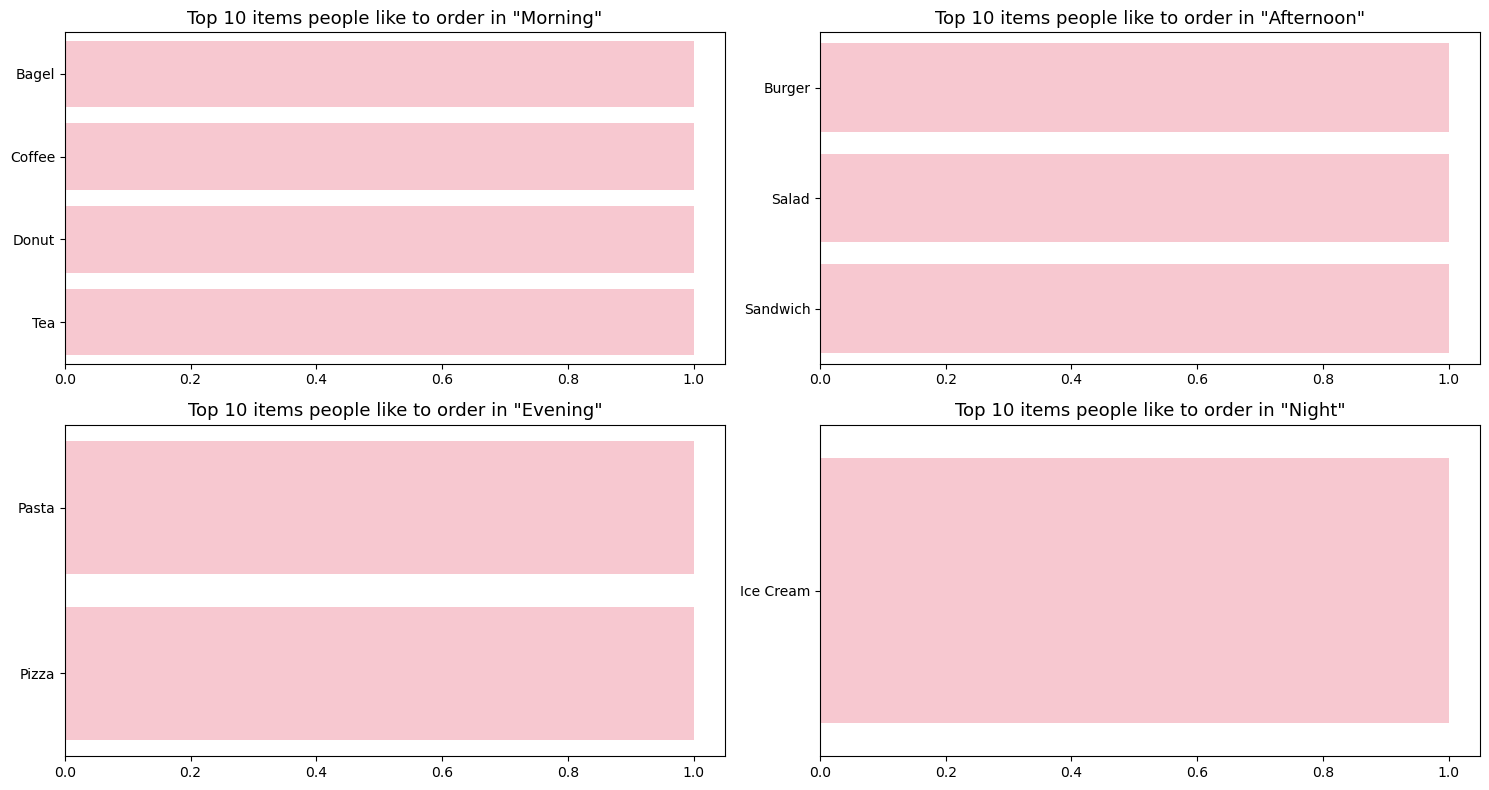

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh dataframe (ganti dengan dataframe yang sesuai dengan data Anda)
data = {
    'period_day': ['morning', 'morning', 'morning', 'morning', 'afternoon', 'afternoon', 'afternoon', 'evening', 'evening', 'night'],
    'Item': ['Coffee', 'Tea', 'Bagel', 'Donut', 'Sandwich', 'Salad', 'Burger', 'Pizza', 'Pasta', 'Ice Cream'],
    'Transaction': [20, 18, 15, 12, 30, 25, 22, 40, 35, 50]
}
df = pd.DataFrame(data)

# Kelompokkan berdasarkan 'period_day' dan 'Item', hitung jumlah transaksi, dan sortir
data = df.groupby(['period_day', 'Item'])['Transaction'].count().reset_index().sort_values(['period_day', 'Transaction'], ascending=False)

# Urutan periode hari
day = ['morning', 'afternoon', 'evening', 'night']

# Plotting
plt.figure(figsize=(15, 8))
for i, j in enumerate(day):
    plt.subplot(2, 2, i + 1)
    df1 = data[data.period_day == j].head(10)
    sns.barplot(data=df1, y='Item', x='Transaction', color='pink')
    plt.xlabel('')  # Label sumbu x tidak diperlukan pada plot ini
    plt.ylabel('')  # Label sumbu y tidak diperlukan pada plot ini
    plt.title('Top 10 items people like to order in "{}"'.format(j.capitalize()), size=13)

plt.tight_layout()  # Untuk memastikan subplot tidak tumpang tindih
plt.show()


In [28]:
pip install mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    -------------------------------------

In [27]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,12,Donut,1
1,15,Bagel,1
2,18,Tea,1
3,20,Coffee,1
4,22,Burger,1
5,25,Salad,1
6,30,Sandwich,1
7,35,Pasta,1
8,40,Pizza,1
9,50,Ice Cream,1


In [29]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Item,Bagel,Burger,Coffee,Donut,Ice Cream,Pasta,Pizza,Salad,Sandwich,Tea
Transaction,,,,,,,,,,
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,Bagel,Burger,Coffee,Donut,Ice Cream,Pasta,Pizza,Salad,Sandwich,Tea
Transaction,,,,,,,,,,
12,0,0,0,1,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,1
20,0,0,1,0,0,0,0,0,0,0
22,0,1,0,0,0,0,0,0,0,0


In [34]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,Bagel,Burger,Coffee,Donut,Ice Cream,Pasta,Pizza,Salad,Sandwich,Tea
Transaction,,,,,,,,,,
12,0,0,0,1,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,1
20,0,0,1,0,0,0,0,0,0,0
22,0,1,0,0,0,0,0,0,0,0


In [35]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.1,(Bagel)
1,0.1,(Burger)
2,0.1,(Coffee)
3,0.1,(Donut)
4,0.1,(Ice Cream)
5,0.1,(Pasta)
6,0.1,(Pizza)
7,0.1,(Salad)
8,0.1,(Sandwich)
9,0.1,(Tea)


In [36]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [37]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
